In [67]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import autokeras as ak

In [68]:
model_theta23 = tf.keras.models.load_model('/home/ML4NO/ML_DUNE/Regression/models_PoissonTrain/0910_theta23_3_1_1.h5')
model_theta23.summary()
model_delta = tf.keras.models.load_model('/home/ML4NO/ML_DUNE/Regression/models_PoissonTrain/0910_delta_5_1_1.h5')
model_delta.summary()

Model: "Model_DNN_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BatchNormalization (BatchNor (None, 264)               1056      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               135680    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
output (Dense)               (None, 1)                 1025      
Total params: 925,729
Trainable params: 925,201
Non-trainable params: 528
_________________________________________________________________
Model: "Model_DNN_regression"
_________________________________________________________________
Layer (t

In [69]:
data = np.load('/home/ML4NO/Data/best_fit_spectrum_DUNE.npz')
data_all = np.column_stack([data['ve_dune_poisson'], data['vu_dune_poisson'], data['vebar_dune_poisson'], data['vubar_dune_poisson']])
true_theta23 = data['theta23_true']
true_delta = data['delta_true']
fit_theta23 = data['theta23_fit']
fit_delta = data['delta_fit']

In [70]:
pre_theta23 = model_theta23.predict(data_all)
pre_delta = model_delta.predict(data_all)

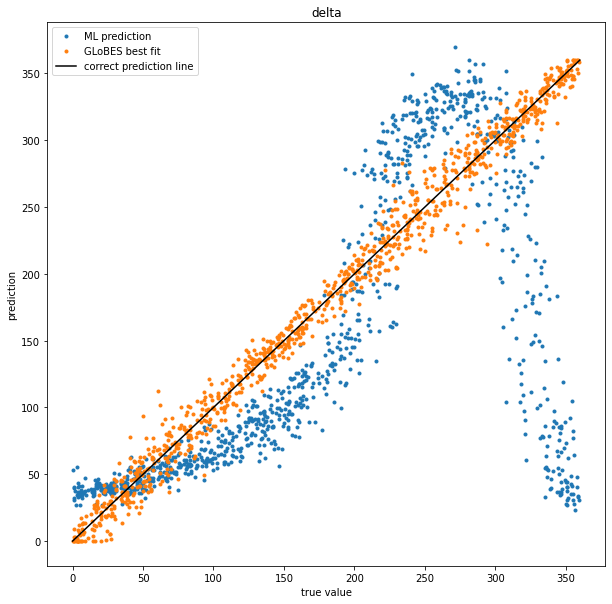

In [71]:
plt.figure(figsize = (10,10))
plt.plot(true_delta, pre_delta, '.', label = 'ML prediction')
plt.plot(true_delta, fit_delta, '.', label = 'GLoBES best fit')
plt.plot([0,360],[0,360], 'k', label = 'correct prediction line')
plt.xlabel('true value')
plt.ylabel('prediction')
plt.title('delta')
plt.legend()
plt.show()

In [63]:
ML_mse = ((true_delta - pre_delta)**2).mean()
fit_mse = ((true_delta - fit_delta)**2).mean()
print('ML_mse = {}'.format(ML_mse))
print('fit_mse = {}'.format(fit_mse))

ML_mse = 22482.328667803235
fit_mse = 139.33346211284027


In [64]:
ML_rmse = (np.sqrt((true_delta - pre_delta)**2)).mean()
fit_rmse = (np.sqrt((true_delta - fit_delta)**2)).mean()
print('ML_rmse = {}'.format(ML_rmse))
print('fit_rmse = {}'.format(fit_rmse))

ML_rmse = 122.302269904259
fit_rmse = 8.75864667398835


In [65]:
ML_mae = (np.abs((true_delta - pre_delta)**2)).mean()
fit_mae = (np.abs((true_delta - fit_delta)**2)).mean()
print('ML_mae = {}'.format(ML_mae))
print('fit_mae = {}'.format(fit_mae))

ML_mae = 22482.328667803235
fit_mae = 139.33346211284027
